# ***Installation***

In [1]:
!apt-get install swig -y
!pip install Cython numpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
!pip install auto-sklearn

# ***Importing Libraries and Dependencies***

In [22]:
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import autosklearn.regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ***Data Loading***

In [10]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

# ***Train Test Split***

In [11]:
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

# ***Building a Regressor***

In [12]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    
)

# ***Fitting a Regressor***

In [13]:
automl.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

# ***Leaderboard***

In [14]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
25           1             0.46                sgd  0.436679   0.793741
6            2             0.32     ard_regression  0.455042   0.783732
27           3             0.14     ard_regression  0.462249   0.775063
11           4             0.02      random_forest  0.507400  10.586582
7            5             0.06  gradient_boosting  0.518673   1.361092


# ***Viewing Models***

In [16]:
print(automl.show_models())

[(0.460000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'sgd', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:polynomial:degree': 3, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:sgd:alpha': 0.0006517033225329654, 'regressor:sgd:average': 'False', 'regressor:sgd:fit_intercept': 'True', 'regressor:sgd:learning_rate': 'invscaling', 'regressor:sgd:loss': 'epsilon_insensitive', 'regressor:sgd:penalty': 'elasticnet', 'regressor:sgd:tol': 0.0024317

# ***Score of Final Ensemble***

In [17]:
# The values range between -inf and 1 with 1 being the best possible value. A dummy estimator
# predicting the data mean has an R2 score of 0.

train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

######################

Train R2 score: 0.5944780427522034
Test R2 score: 0.3959585042866587


# ***Plotting Predictions***

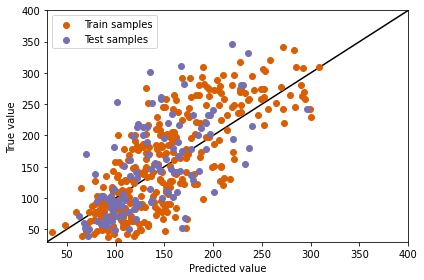

In [23]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()
